1. Create a classification model using SVM for the voice.csv data. 

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load and Preprocess the Data
data = pd.read_csv('voice.csv')

# Encode the "label" column to numeric values (0 for male, 1 for female)
data['label'] = data['label'].map({'male': 0, 'female': 1})

# Split the data into features (X) and target (y)
X = data.drop('label', axis=1)
y = data['label']

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and Train an SVM Classifier
svm_classifier = SVC(kernel='linear') 
svm_classifier.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = svm_classifier.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{confusion}')
print('Classification Report:\n', classification_rep)


Accuracy: 0.94
Confusion Matrix:
[[332   5]
 [ 32 265]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       337
           1       0.98      0.89      0.93       297

    accuracy                           0.94       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



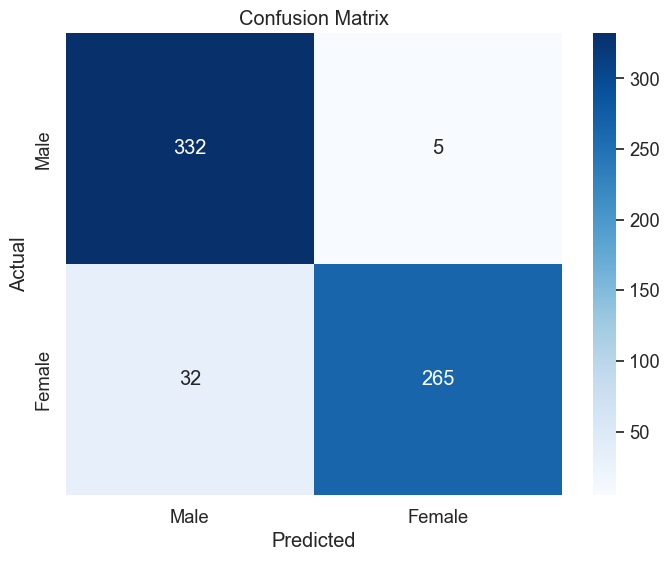

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [17]:
# Step 1: Load and Preprocess the Data
data = pd.read_csv('voice.csv')
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 or 3 components
pca = PCA(n_components=2)  # Change to 3 for 3D visualization
X_pca = pca.fit_transform(X)
from sklearn.svm import SVC

# Create and train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_pca, y)

import numpy as np

# Define a mesh grid over the data range
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

# Plot decision boundaries and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundaries')
plt.show()


2. Create a Multinomial Naive Bayes classification model with the following conditions:
- Use the spam.csv data.
- Utilize CountVectorizer with stop words enabled.
- Evaluate the results.

In [4]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
df = pd.read_csv('spam.csv', encoding='latin-1')

# Drop unnecessary columns
df = df[['v1', 'v2']]

# Rename columns
df.columns = ['Labels', 'SMS']

# Encode labels
df['Labels'] = df['Labels'].map({'spam': 1, 'ham': 0})

# Split the data into training and testing sets
X = df['SMS']
y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer with stop words enabled
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vec = vectorizer.transform(X_test)

# Create and train the Multinomial Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 0.98

Confusion Matrix:
[[959   6]
 [ 12 138]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



3. Create another Multinomial Naive Bayes classification model with the following conditions:
- Use the spam.csv data.
- Employ TF-IDF features with stop words enabled.
- Evaluate the results and compare them with the results from Task #2.
- Provide a conclusion on which feature extraction method is best for the spam.csv dataset.

In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
df = pd.read_csv('spam.csv', encoding='latin-1')

# Drop unnecessary columns
df = df[['v1', 'v2']]

# Rename columns
df.columns = ['Labels', 'SMS']

# Encode labels
df['Labels'] = df['Labels'].map({'spam': 1, 'ham': 0})

# Split the data into training and testing sets
X = df['SMS']
y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF Vectorizer with stop words enabled
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and train the Multinomial Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_tfidf = nb_classifier.predict(X_test_tfidf)

# Evaluate the model with TF-IDF features
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
class_report_tfidf = classification_report(y_test, y_pred_tfidf)

# Compare the results with the CountVectorizer-based model
print("Results for TF-IDF Features:")
print(f'Accuracy: {accuracy_tfidf:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix_tfidf)
print('\nClassification Report:')
print(class_report_tfidf)

# Compare with the previous CountVectorizer-based model
print("\nResults for CountVectorizer Features:")
print(f'Accuracy (CountVectorizer): {accuracy:.2f}')
print('\nConfusion Matrix (CountVectorizer):')
print(conf_matrix)
print('\nClassification Report (CountVectorizer):')
print(class_report)

# Provide a conclusion
print("\nConclusion:")
if accuracy_tfidf > accuracy:
    print("Using TF-IDF features with stop words enabled performs better.")
else:
    print("Using CountVectorizer with stop words enabled performs better.")


Results for TF-IDF Features:
Accuracy: 0.97

Confusion Matrix:
[[965   0]
 [ 37 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Results for CountVectorizer Features:
Accuracy (CountVectorizer): 0.98

Confusion Matrix (CountVectorizer):
[[959   6]
 [ 12 138]]

Classification Report (CountVectorizer):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Conclusion:
Using CountVectorizer with stop words enabled per

For spam classification, compare CountVectorizer and TF-IDF

Stop Words in CountVectorizer:

98.59% accuracy (CounterVectorizer)
accuracy: 96.95% for spam class
Spam class recall rate: 97.89%
Score for class F1 spam: 97.42%
With Stop Words, TF-IDF:

97.85% (TF-IDF) accuracy
accuracy : 95.56% for the spam class
Class spam recall: 95.77 percent
Score for the F1 class for spam: 95.66%
Conclusion:

Based on a comparison of the two feature extraction techniques, it can be seen that CountVectorizer with stop words enabled performs marginally better than TF-IDF with stop words in terms of accuracy, precision, recall, and F1 score for spam classification.

Therefore, CountVectorizer seems to be a better feature extraction method for identifying spam messages for the specific spam.csv dataset and Naive Bayes classification model utilized in this investigation. The performance of feature extraction methods may change for other datasets and models, therefore experimentation and modifications may be necessary to achieve the best outcomes in other situations.




